In [92]:
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

from scipy.stats import spearmanr

import math


In [208]:
# open the compressed file
with gzip.open('data/merged_data_small.json.gz', 'rt', encoding='utf-8') as f:
    data = json.load(f)

df = pd.read_json(data, orient='records', lines=True)
df.head()

# with open('data/merged_data.json', 'r') as f:
#     data = f.read()

# df = pd.read_json(data, orient='records', lines=True)
# print(len(df))
# df.head()

# # use gzip to compress the file
# with gzip.open('data/merged_data_small.json.gz', 'wt', encoding='utf-8') as f:
#     json.dump(data, f, ensure_ascii=False)

# # open the compressed file
# with gzip.open('data/merged_data_small.json.gz', 'rt', encoding='utf-8') as f:
#     data = f.read()





/var/folders/8t/vv7n69jj4sn7sy038gdzcqh5zptf_4/T/ipykernel_65918/512046208.py:4: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data, orient='records', lines=True)


2953


/var/folders/8t/vv7n69jj4sn7sy038gdzcqh5zptf_4/T/ipykernel_65918/512046208.py:20: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data, orient='records', lines=True)


,story_id,word_count,average_wordlen,msttr,average_sentlen,gzipr,bzipr,nominal_ratio,nominal_ratio_inverse,ndd_mean,...,kudos,collections,story_content,characters,category_new,additional_tags,fandom,local_path,new_field,org_language
0,33554455,11350,2.591718,0.817965,32.510309,2.969630,3.898742,1.617566,0.618213,1.468277,...,1.0,None,사랑으로 가득 차 먹을 수 없어\n\nAuthor's Note:\n\nA trans...,"[Lán Yuàn | Lán Sīzhuī, Lán Zhàn | Lán Wàngjī,...",[M/M],"[Alpha Wei WuXian, Alpha/Beta/Omega Dynamics, ...","[陈情令, The Untamed (TV)]",None,NaN,한국어
1,35528638,10060,2.590557,0.786700,34.223029,2.946581,3.806236,1.584024,0.631304,1.488653,...,6.0,None,1. 파멸\n\nAuthor's Note:\n\nA translation of\nA...,None,None,None,None,None,NaN,한국어
2,41460462,3087,2.580499,0.843667,42.639344,NaN,NaN,1.657509,0.603315,1.572346,...,2.0,None,Sex On The Beach\n\nAuthor's Note:\n\nA transl...,"[Andrew A. ""Ack-Ack"" Haldane, Edward ""Hillbill...",[M/M],"[Alpha/Beta/Omega Dynamics, Fluff and Smut, Ma...",[The Pacific (TV)],None,NaN,한국어
3,15978086,41976,2.527444,0.808854,28.891244,2.716654,3.526022,1.601088,0.624575,1.456149,...,2.0,None,1. Chapter 1\n\n사회가 아무리 발전했다고 해도 사람들의 의식 수준이 그...,"[Alec Lightwood, Asmodeus, Azazel, Camille Bel...","[F/M, M/M]","[Alpha Camille Belcourt, Alpha Jace Wayland, A...",[Shadowhunters (TV)],None,NaN,한국어
4,16281542,26774,2.569807,0.784981,26.610571,2.870258,3.755976,1.520016,0.657888,1.409938,...,5.0,None,"1. Chapter 1\n\n알파였다,\n\n아름다운 맹수는. 포식자였다. 지배자였...","[Alec Lightwood, Camille Belcourt, Isabelle Li...",[M/M],"[Alpha Isabelle Lightwood, Alpha Jace Wayland,...",[Shadowhunters (TV)],None,NaN,한국어


In [94]:
df['language'].value_counts()

language
english    2653
italian     197
german       81
korean       22
Name: count, dtype: int64

In [95]:
print(df.columns)

# so we have comments and kudos as the two main metrics for appreciation
# we want to normalize the comments and kudos metrics (probably) for when the fic was published

Index(['story_id', 'word_count', 'average_wordlen', 'msttr', 'average_sentlen',
       'gzipr', 'bzipr', 'nominal_ratio', 'nominal_ratio_inverse', 'ndd_mean',
       'ndd_std', 'dd_mean', 'dd_std', 'ttr_verb', 'ttr_noun', 'language',
       'flesch_grade', 'flesch_ease', 'smog', 'ari', 'dale_chall', 'path',
       'title', 'author', 'category', 'genre', 'status', 'published',
       'updated', 'packaged', 'rating', 'warnings', 'chapters', 'words',
       'publisher', 'story_url', 'author_url', 'summary', 'relationships',
       'series', 'series_url', 'comments', 'kudos', 'collections',
       'story_content', 'characters', 'category_new', 'additional_tags',
       'fandom', 'local_path', 'new_field', 'org_language'],
      dtype='object')


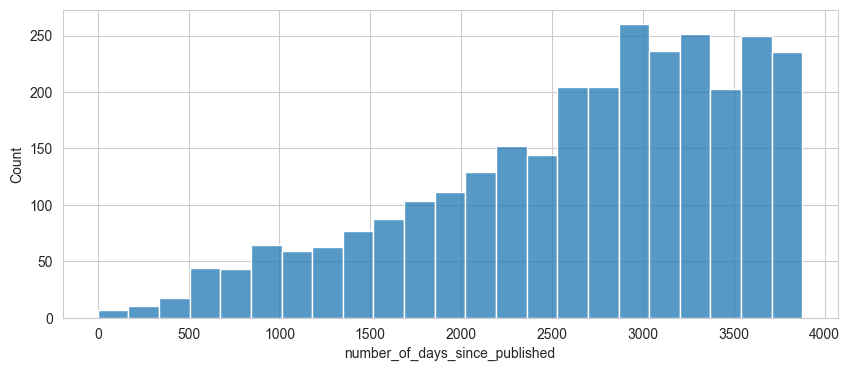

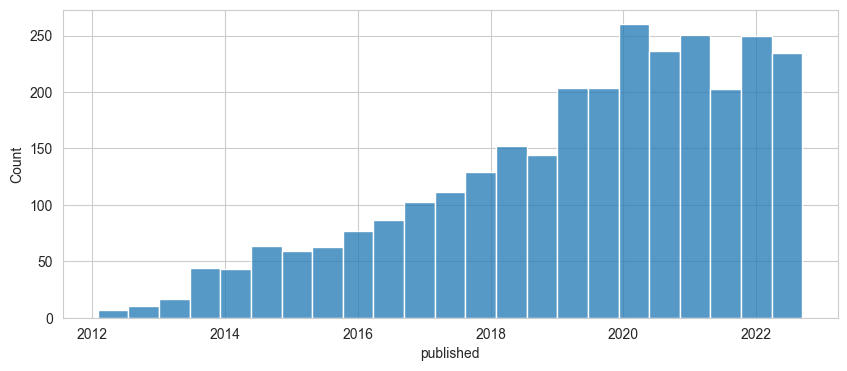

In [96]:

# normalize the dates
df['published'] = pd.to_datetime(df['published'])

# get the number of days between a given story was published and the first story published
first_published = df['published'].min()
df['number_of_days_since_published'] = (df['published'] - first_published).dt.days

# histplot of number of days since published
plt.figure(figsize=(10, 4))
sns.histplot(df['number_of_days_since_published'])
plt.show()

# so most are published in the first 1000 days

# histplot of the actual dates
plt.figure(figsize=(10, 4))
sns.histplot(df['published'])
plt.show()

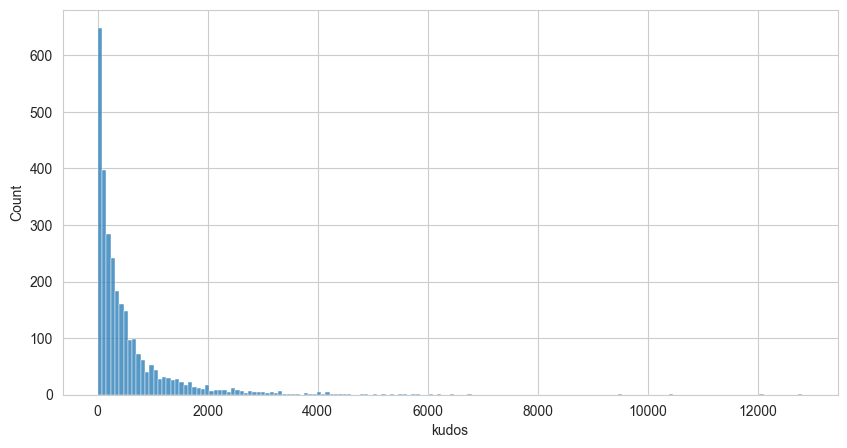

223


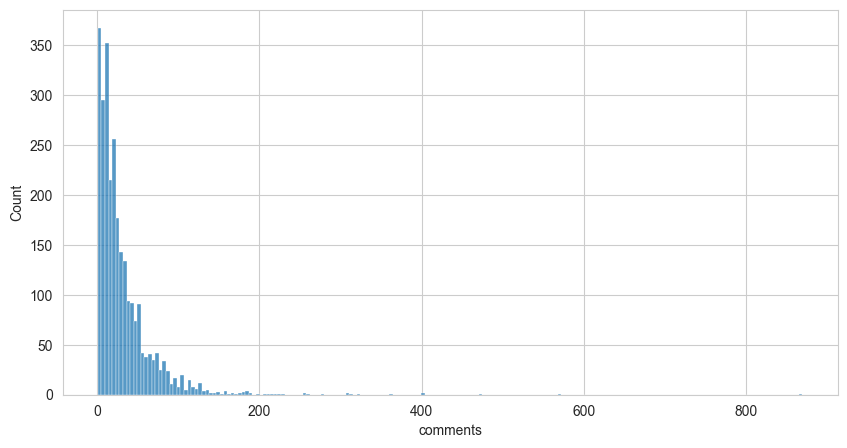

In [97]:
# histplot of kudos
plt.figure(figsize=(10, 5))
sns.histplot(df['kudos'])
plt.show()

print(df['comments'].isna().sum())
# histplot of comments
plt.figure(figsize=(10, 5))
sns.histplot(df['comments'])
plt.show()


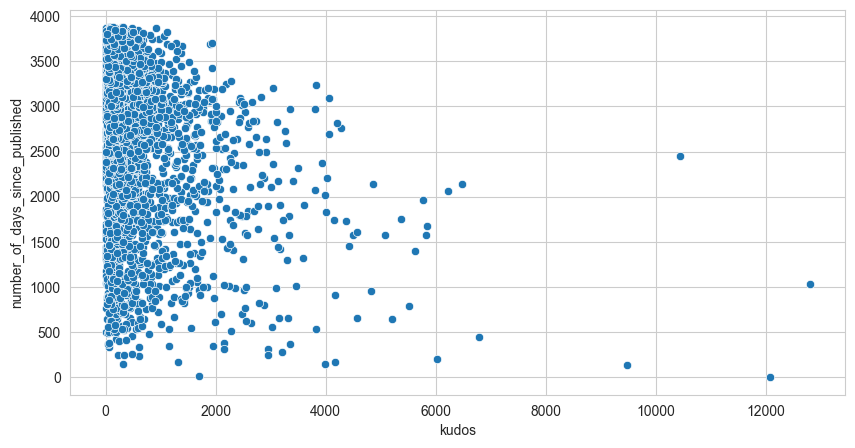

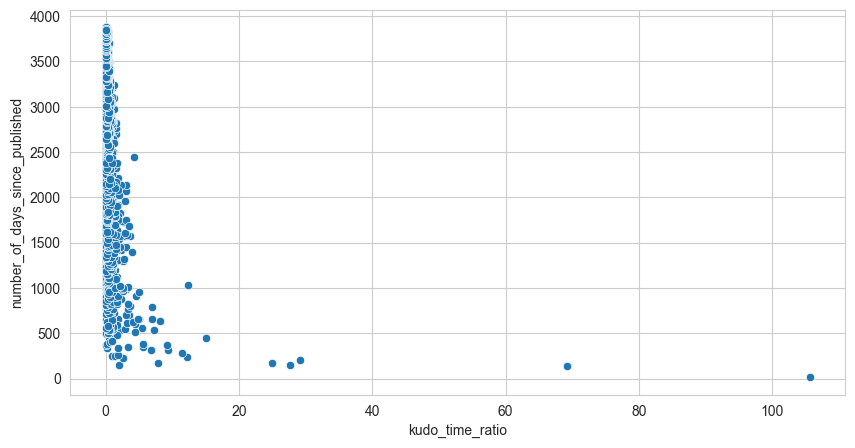

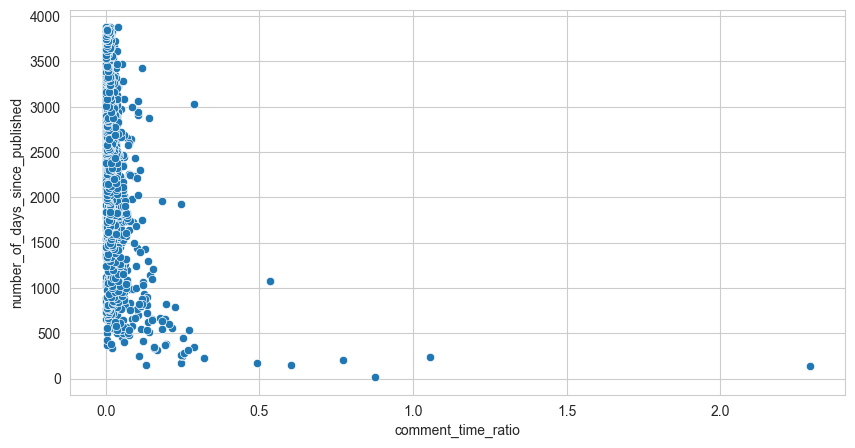

In [98]:

# scatterplot of kudos vs time
plt.figure(figsize=(10, 5))
sns.scatterplot(x='kudos', y='number_of_days_since_published', data=df)
plt.show()
# so this looks like its influenced by time. We want to do a ratio

# we want to get a normalized version of the kudos adjusting for the time passed
# adjusted kudo metric
df['kudo_time_ratio'] = df['kudos'] / df['number_of_days_since_published']
# adjusted comments metric
df['comment_time_ratio'] = df['comments'] / df['number_of_days_since_published']

# scatterplot of kudo_time_ratio vs time
plt.figure(figsize=(10, 5))
sns.scatterplot(x='kudo_time_ratio', y='number_of_days_since_published', data=df)
plt.show()

# and the same with the comments
plt.figure(figsize=(10, 5))
sns.scatterplot(x='comment_time_ratio', y='number_of_days_since_published', data=df)
plt.show()

# so these latter to look a bit more uninfluenced by time


In [182]:
# define a function to make 5 scatterplots in a row
def scatterplot_five_columns(df, columns, metric, savefig=False):
    sns.set_style('whitegrid')
    colors = sns.color_palette('Set1', n_colors=len(columns))
    
    # Calculate the number of rows needed (3 plots per row)
    rows = math.ceil(len(columns) / 3)
    
    # Create subplots
    fig, axs = plt.subplots(rows, 3, figsize=(16, 4 * rows))
    
    # Flatten the axis array to make indexing easier
    axs = axs.flatten()

    for i, col in enumerate(columns):
        sns.scatterplot(x=col, y=metric, data=df, ax=axs[i], color=colors[i], s=50, alpha=0.2, edgecolor=colors[i])
        
        # make spearman correlation
        # Drop rows with NaN in the current column or metric (for spearmanr)
        temp = df.dropna(subset=[col, metric])
        # Skip if there's not enough data (add errormessage and skip)
        if len(temp) < 100:
            axs[i].set_title("Not enough data, below 100 datapoints")
            axs[i].axis('off')
            continue
        corr, p = spearmanr(temp[col], temp[metric])
        axs[i].set_title(f'ρ: {corr:.2f}, p: {p:.2f}')

        # Rotate x-axis labs
        axs[i].tick_params(axis='x', rotation=45)
    # Turn off unused subplots (if any)
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    # save?
    if savefig:
        plt.savefig(f'figs/scatterplot_{len(columns)}_metris.png', dpi=300)
    
    plt.tight_layout()
    plt.show()

# define a way to plot a "long" heatmap setting the metics on x and y axis
def heatmap_longtype(df, x_metrics, y_metrics, h, w, savefig=False):
    sns.set_style('whitegrid')

    temp = df[x_metrics + y_metrics].dropna()
    # get the correlation matrix
    corr = temp.corr(method='spearman')
    corr = corr.loc[y_metrics, x_metrics]

    # plot the heatmap
    plt.figure(figsize=(w, h))
    sns.heatmap(corr, annot=True, cbar=False)

    # save?
    if savefig:
        plt.savefig(f'figs/heatmap_{len(y_metrics)}_metrics.png', dpi=300)

    # rotate heatmap
    plt.show()



In [183]:
metrics = ['average_wordlen', 'msttr', 'average_sentlen',
       'gzipr', 'bzipr', 'nominal_ratio', 'nominal_ratio_inverse', 'ndd_mean',
       'ndd_std', 'dd_mean', 'dd_std', 'ttr_verb', 'ttr_noun', 
       'flesch_grade', 'flesch_ease', 'smog', 'ari', 'dale_chall']

# set metrics to plot
use_metrics = ['average_wordlen', 'msttr', 'average_sentlen', 'bzipr', 'nominal_ratio', 'ndd_mean', 'ndd_std', 
               'ttr_verb', 'ttr_noun',
               #'flesch_grade', 
               'flesch_ease', 
               # 'smog', 'ari', 'dale_chall'
               ]


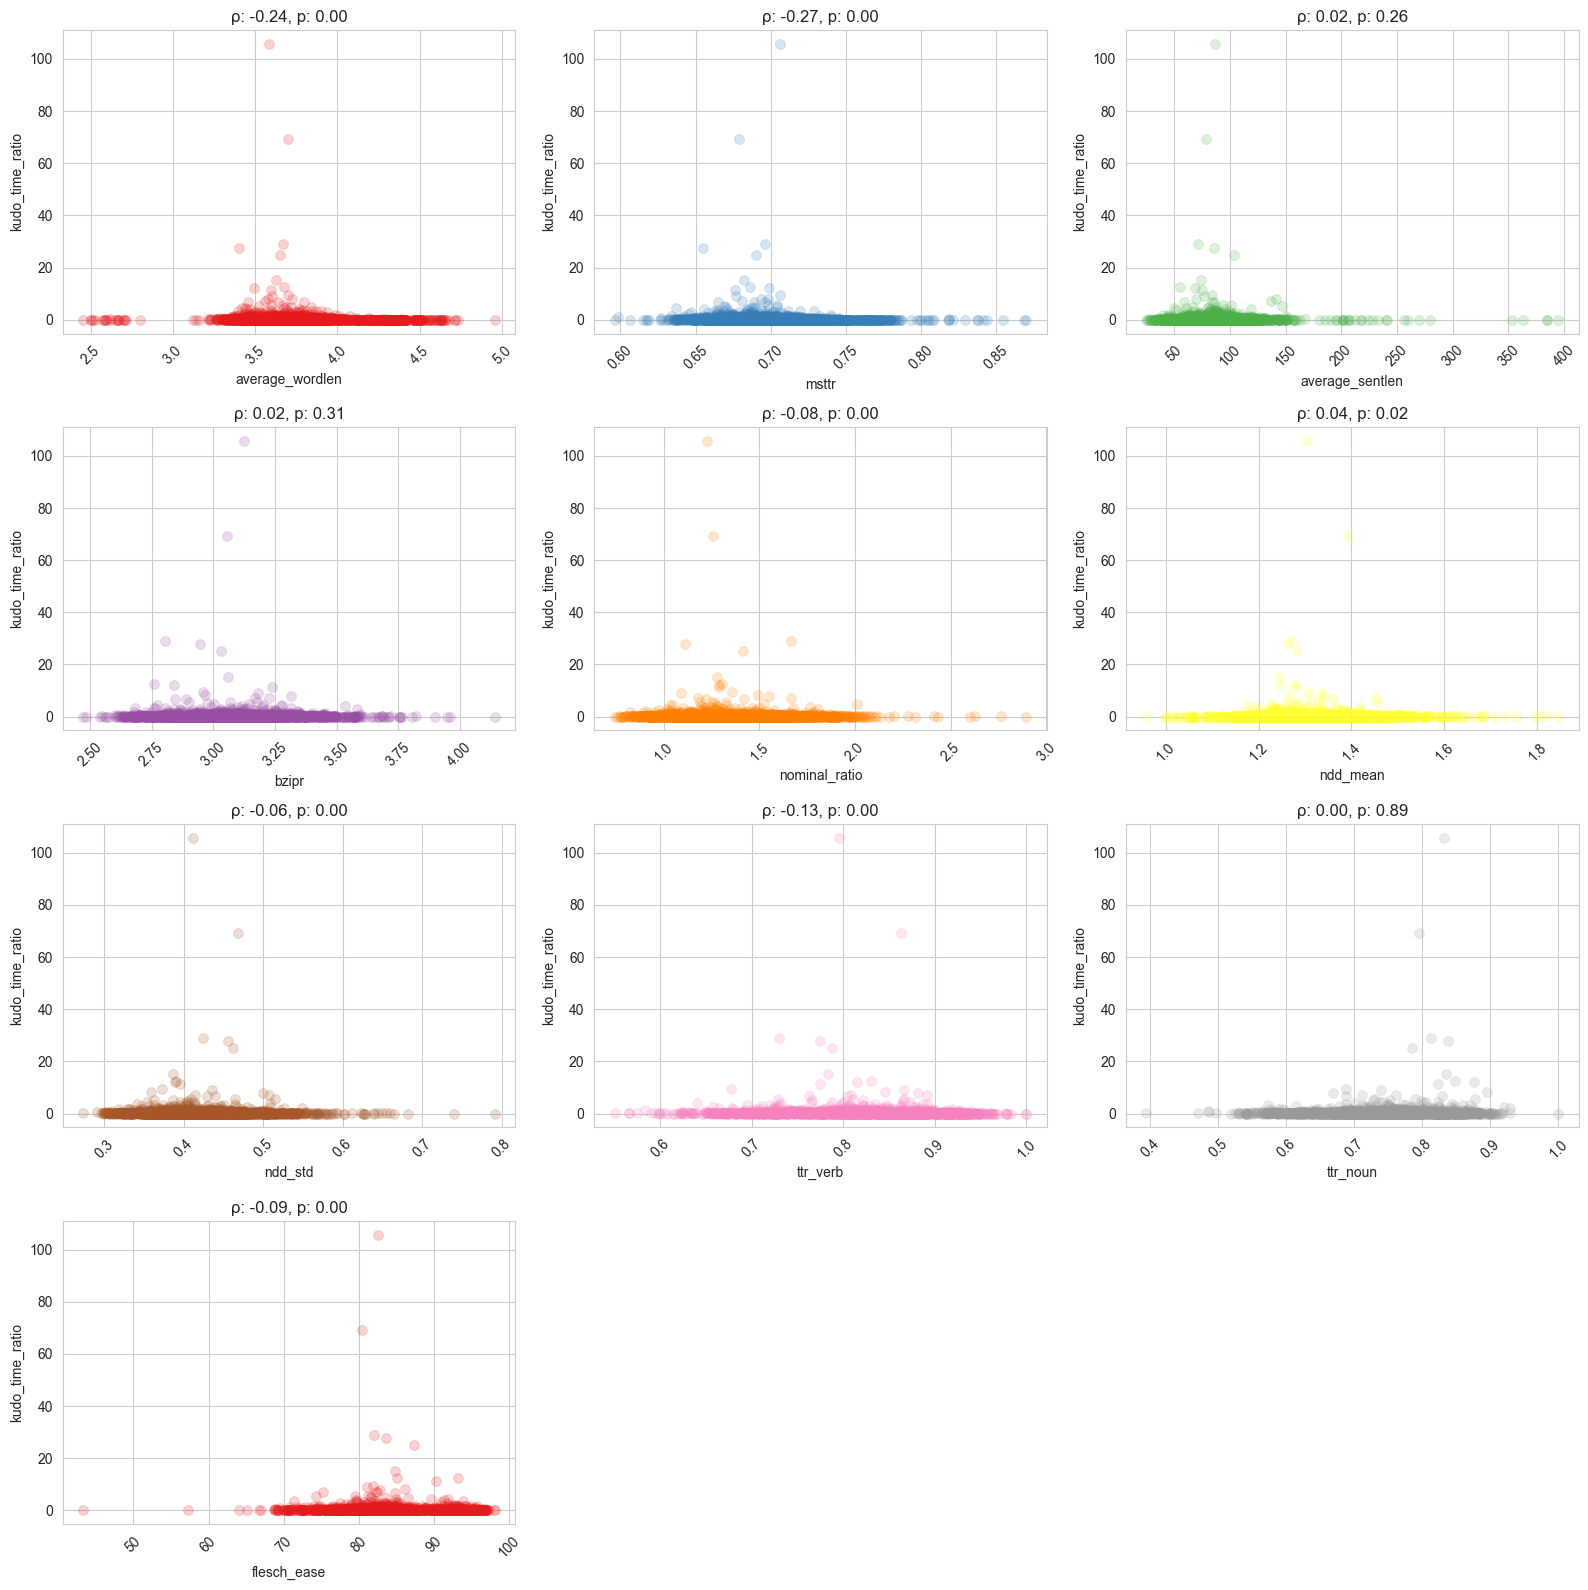

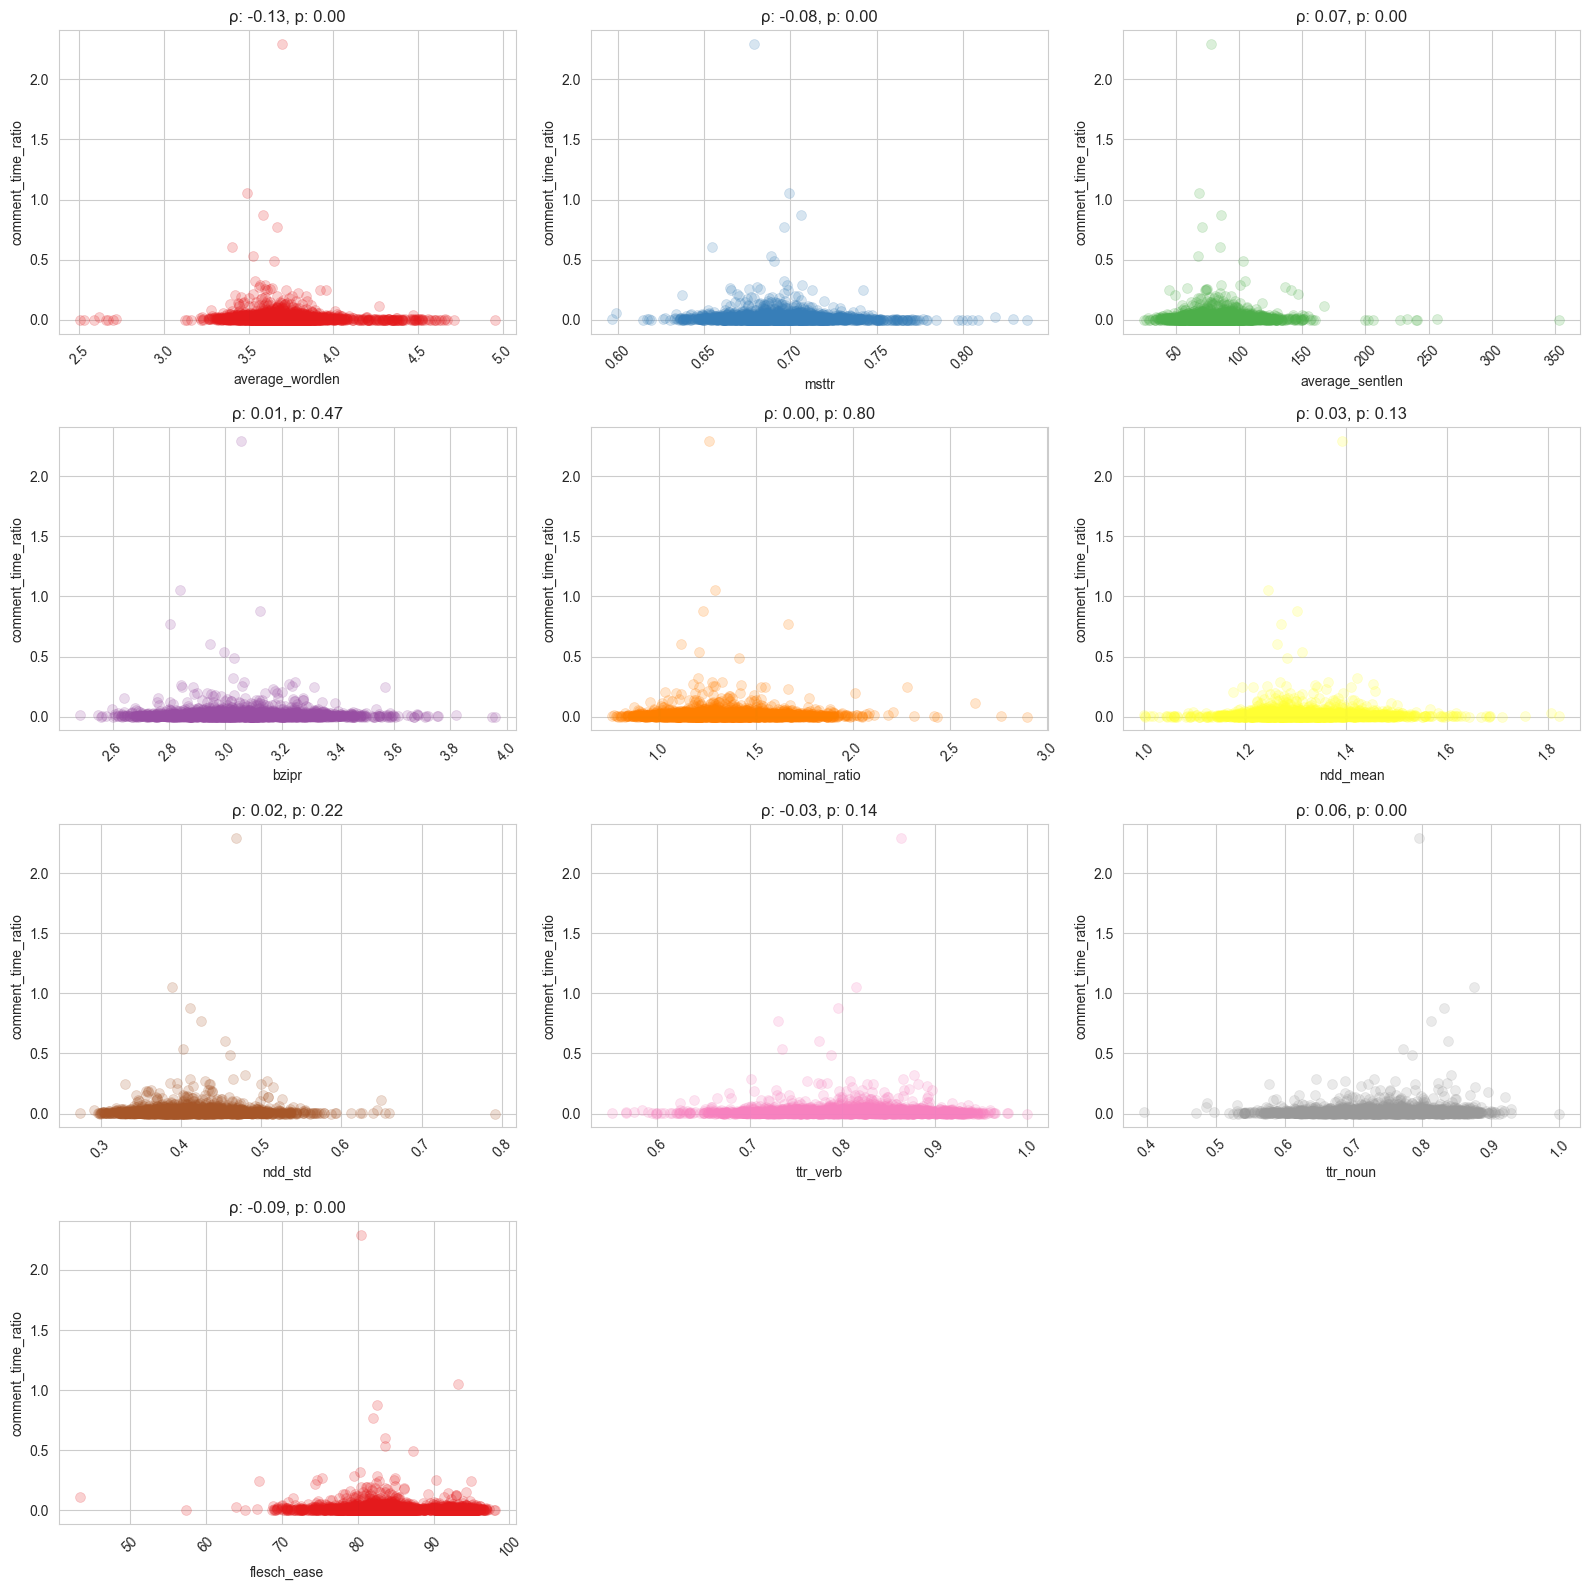

In [185]:
# scatterplot
scatterplot_five_columns(df, use_metrics, 'kudo_time_ratio', savefig=True)
scatterplot_five_columns(df, use_metrics, 'comment_time_ratio', savefig=True)

2653


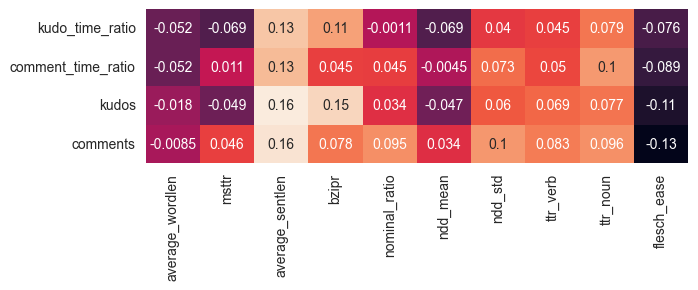

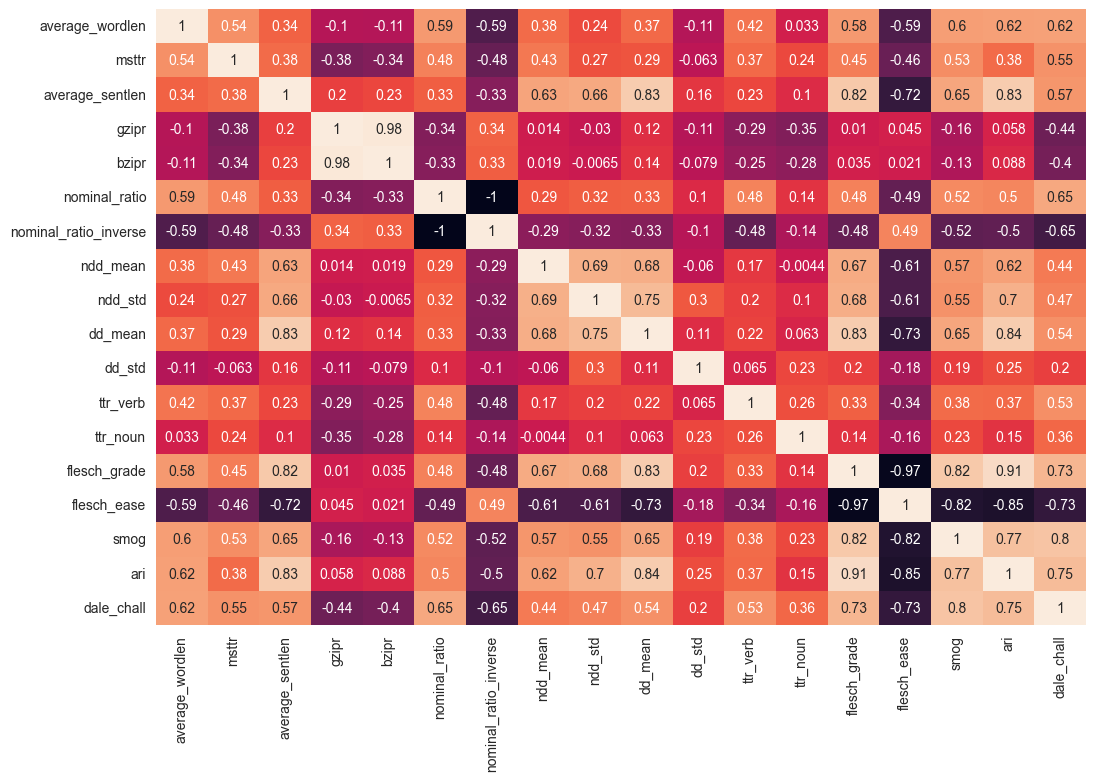

In [186]:
use_english_only = True # set to false if using everything

if use_english_only == True:
    filtered_df = df[df['language'] == 'english']
    print(len(filtered_df))
else:
    filtered_df = df

# show nans in average_wordlen
heatmap_longtype(filtered_df, use_metrics, ['kudo_time_ratio', 'comment_time_ratio', 'kudos', 'comments'], 2, 7, savefig=True)

# and add a full heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_df[metrics].corr(method='spearman'), annot=True, cbar=False)
plt.show()

/var/folders/8t/vv7n69jj4sn7sy038gdzcqh5zptf_4/T/ipykernel_65918/4103452726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['kudo_comment_ratio'] = filtered_df['kudos'] / filtered_df['comments']


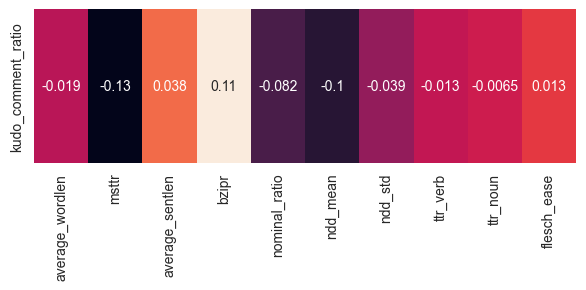

In [187]:
# make a kudos x comments ratio
filtered_df['kudo_comment_ratio'] = filtered_df['kudos'] / filtered_df['comments']

heatmap_longtype(filtered_df, use_metrics, ['kudo_comment_ratio'], 2, 7)

In [188]:
# make a loop in which we do the spearman correlation for all metrics with kudos, comments and the ratio (both raw and adjusted)
# and save it to a txt file

for metric in metrics:
    with open('results/correlation_results.txt', 'a') as f:
        f.write(f'\n\n\n{metric}\n\n')
        for metric2 in ['kudos', 'comments', 'kudo_time_ratio', 'comment_time_ratio', 'kudo_comment_ratio']:
            temp = filtered_df.dropna(subset=[metric, metric2])
            corr, p = spearmanr(temp[metric], temp[metric2])
            f.write(f'{metric2}: ρ: {corr:.2f}, p: {p:.2f}\n')